In [23]:
%load_ext autoreload
%autoreload 2

#TODO: Investigate polygon.io
# open source fintech api looks to have a ton of data

import pandas as pd
from common import time_frame_data
from common import clean_data, time_frame, time_frame_data, county_chloropleth, state_choropleth, to_df, convert_snake_case, convert_dataset_to_method
from urllib.request import urlopen
import plotly.graph_objects as go
from settings import *
import plotly.express as px
from models.base import BEA

#datasets = bea.meta.get_available_data_sets()
#parameters = bea.meta.get_available_parameters(dataset)['BEAAPI']['Results']
#parameter_values = bea.meta.get_parameter_values(dataset, parameter)

bea = BEA()
years = time_frame(25)
df = pd.DataFrame(bea.meta.get_available_data_sets()['BEAAPI']['Results']['Dataset'])
convert_dataset_to_method(df)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,DatasetName,DatasetDescription
0,nipa,Standard NIPA tables
1,ni_underlying_detail,Standard NI underlying detail tables
2,mne,Multinational Enterprises
3,fixed_assets,Standard Fixed Assets tables
4,ita,International Transactions Accounts
5,iip,International Investment Position
6,input_output,Input-Output Data
7,intl_serv_trade,International Services Trade
8,gdp_by_industry,GDP by Industry
9,regional,Regional data sets


In [25]:
#bea.regional.access_table('CAGDP11')
#bea.regional.get_parameter_values('CAGDP11', 'LineCode')['ParamValue'][0]['Key']
bea.regional.access_table('CAGDP11')


[{'Code': 'CAGDP11-1',
  'GeoFips': '01001',
  'GeoName': 'Autauga, AL',
  'TimePeriod': '2020',
  'CL_UNIT': 'Percent change',
  'UNIT_MULT': '0',
  'DataValue': '-1.3'},
 {'Code': 'CAGDP11-1',
  'GeoFips': '01003',
  'GeoName': 'Baldwin, AL',
  'TimePeriod': '2020',
  'CL_UNIT': 'Percent change',
  'UNIT_MULT': '0',
  'DataValue': '-2.1'},
 {'Code': 'CAGDP11-1',
  'GeoFips': '01005',
  'GeoName': 'Barbour, AL',
  'TimePeriod': '2020',
  'CL_UNIT': 'Percent change',
  'UNIT_MULT': '0',
  'DataValue': '-5.8'},
 {'Code': 'CAGDP11-1',
  'GeoFips': '01007',
  'GeoName': 'Bibb, AL',
  'TimePeriod': '2020',
  'CL_UNIT': 'Percent change',
  'UNIT_MULT': '0',
  'DataValue': '2.1'},
 {'Code': 'CAGDP11-1',
  'GeoFips': '01009',
  'GeoName': 'Blount, AL',
  'TimePeriod': '2020',
  'CL_UNIT': 'Percent change',
  'UNIT_MULT': '0',
  'DataValue': '-5.4'},
 {'Code': 'CAGDP11-1',
  'GeoFips': '01011',
  'GeoName': 'Bullock, AL',
  'TimePeriod': '2020',
  'CL_UNIT': 'Percent change',
  'UNIT_MULT': '0

In [65]:
df['DataValue'].max()

220645.0

<AxesSubplot:xlabel='TimePeriod'>

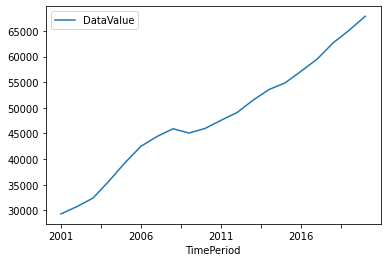

In [22]:

#pd.DataFrame(bea.nipa.access_table('T10107')).iloc[12]
#pd.DataFrame(bea.nipa.access_table('T10107', year=2016, freq='Q'))
#df_filtered = df[df['DataValue'] != '(D)']
#df = clean_data(df_filtered)
#county_chloropleth(df)
#df
#df = pd.DataFrame(time_frame_data(db_object=bea.nipa, table_id='T10107', years=40, iloc=12))
df.plot.line(x='TimePeriod', y='DataValue')

<AxesSubplot:xlabel='TimePeriod'>

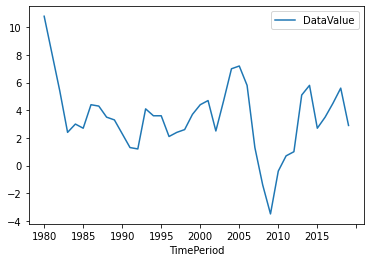

In [7]:
df.plot.line(x='TimePeriod', y='DataValue')

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
df

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95
5,CO,Colorado,state,1851.33,261.4,66.0,14.0,71.94,5.7,12.2,17.99,45.1,73.2,118.27,183.2,400.5,0.00
6,CT,Connecticut,state,259.62,1.1,0.1,6.9,9.49,4.2,8.9,13.10,4.3,6.9,11.16,0.0,0.0,0.00
7,DE,Delaware,state,282.19,0.4,0.6,114.7,2.30,0.5,1.0,1.53,7.6,12.4,20.03,26.9,22.9,0.00
8,FL,Florida,state,3764.09,42.6,0.9,56.9,66.31,438.2,933.1,1371.36,171.9,279.0,450.86,3.5,1.8,78.24
9,GA,Georgia,state,2860.84,31.0,18.9,630.4,38.38,74.6,158.9,233.51,59.0,95.8,154.77,57.8,65.4,1154.07
